# Analyse en Composantes Principales (ACP) - Décathlon

Analyse des profils d'athlètes de décathlon pour identifier des groupes similaires.

## Importation des biblio

In [ ]:
#import des librairies nécessaires à notre analyse
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#config visuelle
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## Chargement des données

In [ ]:
#chargement du CSV
df = pd.read_csv('decathlon.csv', sep=';')

#aperçu
df.head()

,Nom,100m,Longueur,Poids,Hauteur,400m,110m H,Disque,Perche,Javelot,1500m,Classement,Points,Competition
0,Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.0,70.52,280.01,1,8893,JO
1,Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.9,69.71,282.00,2,8820,JO
2,Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.6,55.54,278.11,3,8725,JO
3,Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.4,58.46,265.42,4,8414,JO
4,Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.9,55.39,278.05,5,8343,JO


## Exploration des données

In [ ]:
#infos sur la data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nom          41 non-null     object 
 1   100m         41 non-null     float64
 2   Longueur     41 non-null     float64
 3   Poids        41 non-null     float64
 4   Hauteur      41 non-null     float64
 5   400m         41 non-null     float64
 6   110m H       41 non-null     float64
 7   Disque       41 non-null     float64
 8   Perche       41 non-null     float64
 9   Javelot      41 non-null     float64
 10  1500m        41 non-null     float64
 11  Classement   41 non-null     int64  
 12  Points       41 non-null     int64  
 13  Competition  41 non-null     object 
dtypes: float64(10), int64(2), object(2)
memory usage: 4.6+ KB


In [ ]:
#stats descriptives
df.describe()

,100m,Longueur,Poids,Hauteur,400m,110m H,Disque,Perche,Javelot,1500m,Classement,Points
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,10.998049,7.260000,14.477073,1.976829,49.616341,14.605854,44.325610,4.762439,58.316585,279.024878,12.121951,8005.365854
std,0.263023,0.316402,0.824428,0.088951,1.153451,0.471789,3.377845,0.278000,4.826820,11.673247,7.918949,342.385145
min,10.440000,6.610000,12.680000,1.850000,46.810000,13.970000,37.920000,4.200000,50.310000,262.100000,1.000000,7313.000000
25%,10.850000,7.030000,13.880000,1.920000,48.930000,14.210000,41.900000,4.500000,55.270000,271.020000,6.000000,7802.000000
50%,10.980000,7.300000,14.570000,1.950000,49.400000,14.480000,44.410000,4.800000,58.360000,278.050000,11.000000,8021.000000
75%,11.140000,7.480000,14.970000,2.040000,50.300000,14.980000,46.070000,4.920000,60.890000,285.100000,18.000000,8122.000000
max,11.640000,7.960000,16.360000,2.150000,53.200000,15.670000,51.650000,5.400000,70.520000,317.000000,28.000000,8893.000000


## Préparation des données pour l'ACP

In [ ]:
#on vire les colonnes qui nous intéressent pas pour l'analyse
colonnes_a_exclure = ['Competition', 'Points', 'Classement']
df_acp = df.drop(columns=colonnes_a_exclure)

#on met les noms des athlètes de côté
# mais on index pour après pouvoir les retrouver
noms_athletes = df_acp['Nom']
df_acp = df_acp.set_index('Nom')

#aperçu avant acp, vu que c'est Joyce qui nous fournit les données
# on saute l'ETL
df_acp.head()

,100m,Longueur,Poids,Hauteur,400m,110m H,Disque,Perche,Javelot,1500m
Nom,,,,,,,,,,
Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.0,70.52,280.01
Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.9,69.71,282.00
Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.6,55.54,278.11
Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.4,58.46,265.42
Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.9,55.39,278.05


## Vérification des valeurs manquantes

In [ ]:
#check rapide pour voir si Joyce a bien fait son taf
df_acp.isnull().sum()

100m        0
Longueur    0
Poids       0
Hauteur     0
400m        0
110m H      0
Disque      0
Perche      0
Javelot     0
1500m       0
dtype: int64

## Standardisation des données

In [ ]:
#standardisation des données
scaler = StandardScaler()
donnees_standardisees = scaler.fit_transform(df_acp)

#on remet ça dans un dataframe pour garder les noms de colonnes
df_standardise = pd.DataFrame(donnees_standardisees, columns=df_acp.columns, index=df_acp.index)

## Application de l'ACP

In [8]:
#on lance l'ACP
pca = PCA()
#on lance l'ACP avec toutes les composantes
composantes_principales = pca.fit_transform(df_standardise)

#variance expliquée par chaque composante
variance_expliquee = pca.explained_variance_ratio_
variance_cumulee = np.cumsum(variance_expliquee)

## Variance expliquée

In [9]:
#affichage de la variance expliquée par composante
variance_df = pd.DataFrame({
    'Composante': [f'PC{i+1}' for i in range(len(variance_expliquee))],
    'Variance expliquée (%)': variance_expliquee * 100,
    'Variance cumulée (%)': variance_cumulee * 100
})
variance_df

,Composante,Variance expliquée (%),Variance cumulée (%)
0,PC1,32.719055,32.719055
1,PC2,17.371310,50.090366
2,PC3,14.049167,64.139532
3,PC4,10.568504,74.708036
4,PC5,6.847735,81.555771
5,PC6,5.992687,87.548458
6,PC7,4.512353,92.060811
7,PC8,3.968766,96.029577
8,PC9,2.148149,98.177725
9,PC10,1.822275,100.000000


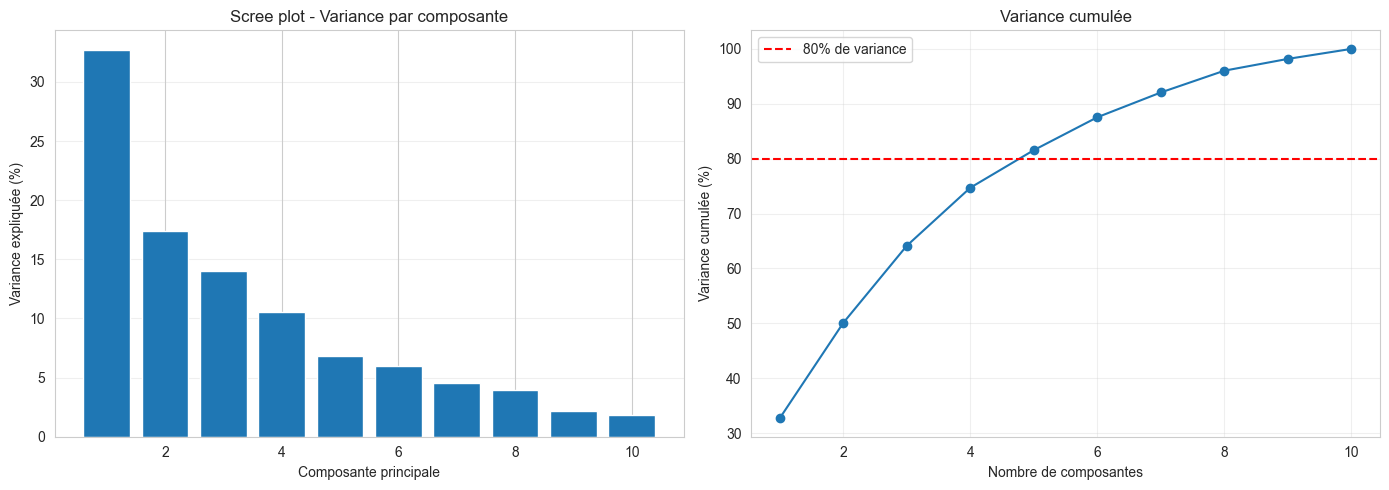

In [10]:
#graphique de la variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

#barplot de la variance par composante
ax1.bar(range(1, len(variance_expliquee) + 1), variance_expliquee * 100)
ax1.set_xlabel('Composante principale')
ax1.set_ylabel('Variance expliquée (%)')
ax1.set_title('Scree plot - Variance par composante')
ax1.grid(axis='y', alpha=0.3)

#courbe de variance cumulée
ax2.plot(range(1, len(variance_cumulee) + 1), variance_cumulee * 100, marker='o')
ax2.axhline(y=80, color='r', linestyle='--', label='80% de variance')
ax2.set_xlabel('Nombre de composantes')
ax2.set_ylabel('Variance cumulée (%)')
ax2.set_title('Variance cumulée')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()

## Projection 2D des individus, pourq ue je puisse identifier les profils d'individu

C:\Users\endle\AppData\Local\Temp\ipykernel_19416\1914091332.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(nom, (df_pca['PC1'][idx], df_pca['PC2'][idx]),


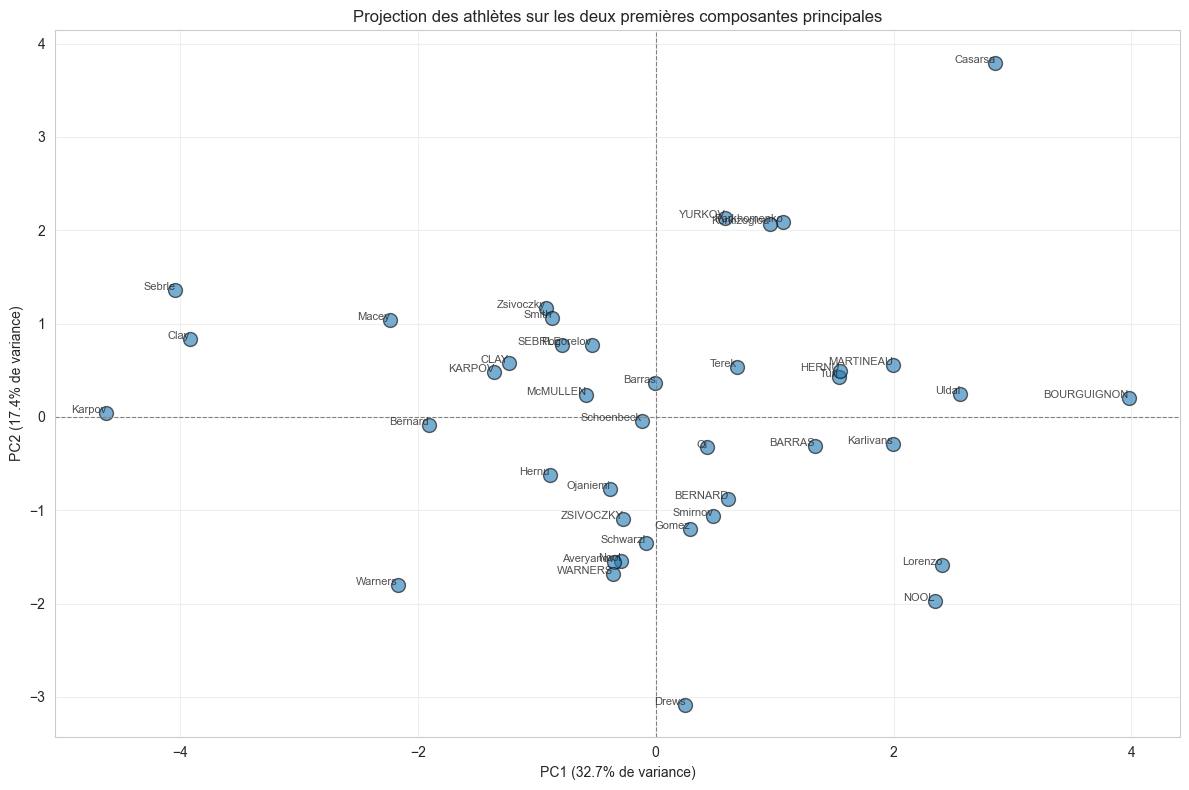

In [ ]:
#création du dataframe avec les coordonnées sur PC1 et PC2
df_pca = pd.DataFrame(
    composantes_principales[:, :2],
    columns=['PC1', 'PC2'],
    index=df_acp.index
)

#graphique :: 
plt.figure(figsize=(12, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], s=100, alpha=0.6, edgecolors='black', linewidth=1)

#ajout des noms des athlètes sur le graphique, gràce à l'index
for idx, nom in enumerate(df_pca.index):
    plt.annotate(nom, (df_pca['PC1'][idx], df_pca['PC2'][idx]), 
                fontsize=8, alpha=0.8, ha='right')

plt.xlabel(f'PC1 ({variance_expliquee[0]*100:.1f}% de variance)')
plt.ylabel(f'PC2 ({variance_expliquee[1]*100:.1f}% de variance)')
plt.title('Projection des athlètes sur les deux premières composantes principales')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(alpha=0.3)
plt.tight_layout()

## Cercle des corrélations - Contributions des variables

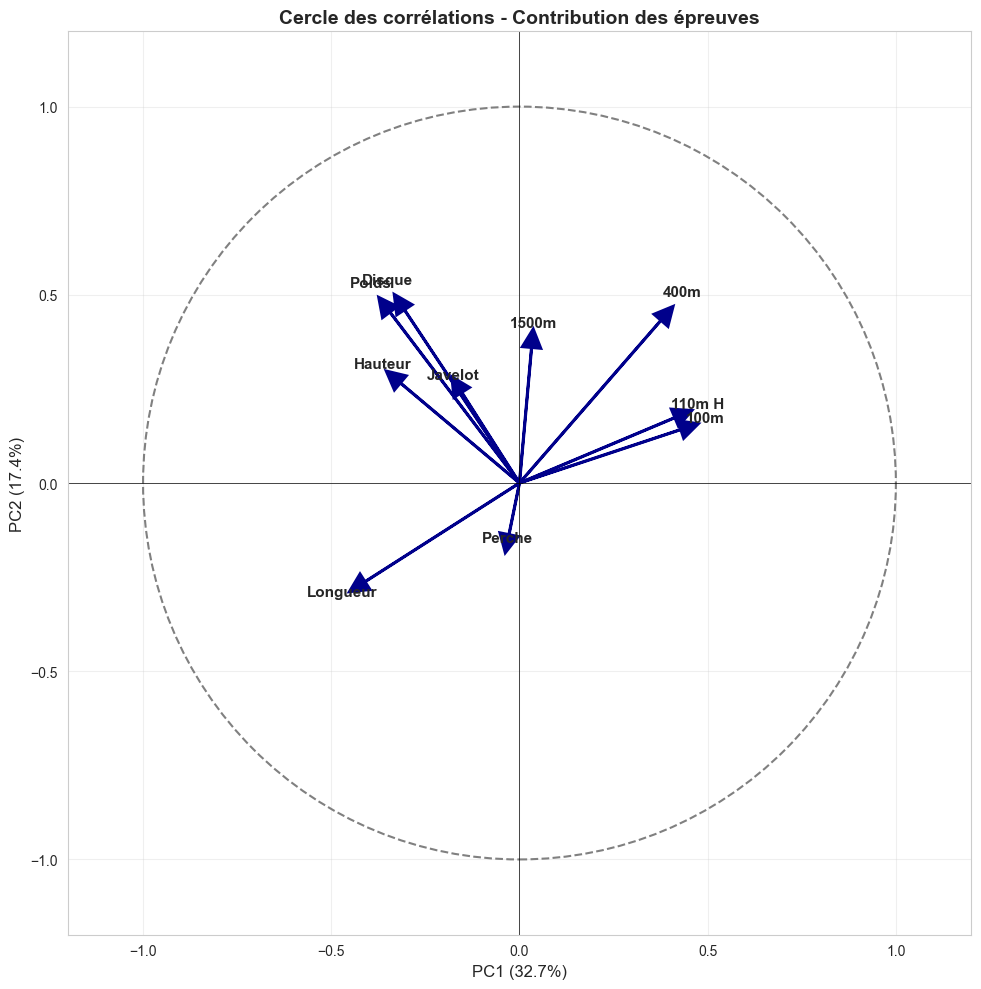

In [ ]:
#récupération des composantes principales pour les variables
#c'est la matrice de rotation qui lie les variables aux composantes
composantes_var = pca.components_

#création du cercle des corrélations
fig, ax = plt.subplots(figsize=(10, 10))

#tracé du cercle unitaire
cercle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--', linewidth=1.5)
ax.add_patch(cercle)

#tracé des flèches pour chaque variable
for i, var in enumerate(df_acp.columns):
    ax.arrow(0, 0, 
            composantes_var[0, i], 
            composantes_var[1, i],
            head_width=0.05, head_length=0.05, 
            fc='darkblue', ec='darkblue', linewidth=2)
    ax.text(composantes_var[0, i] * 1.15, 
           composantes_var[1, i] * 1.15,
           var, fontsize=11, ha='center', weight='bold')

#axes et grille
ax.axhline(y=0, color='black', linewidth=0.5)
ax.axvline(x=0, color='black', linewidth=0.5)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel(f'PC1 ({variance_expliquee[0]*100:.1f}%)', fontsize=12)
ax.set_ylabel(f'PC2 ({variance_expliquee[1]*100:.1f}%)', fontsize=12)
ax.set_title('Cercle des corrélations - Contribution des épreuves', fontsize=14, weight='bold')
ax.grid(alpha=0.3)
ax.set_aspect('equal')
plt.tight_layout()

## Contributions des variables aux composantes principales

In [ ]:
#calcul des contributions en pourcentage pour PC1 et PC2
contributions = pd.DataFrame(
    composantes_var[:2, :].T,
    columns=['PC1', 'PC2'],
    index=df_acp.columns
)

#ajout des contributions au carré pour voir l'importance
contributions['Contrib PC1 (%)'] = (contributions['PC1']**2 / (contributions['PC1']**2).sum()) * 100
contributions['Contrib PC2 (%)'] = (contributions['PC2']**2 / (contributions['PC2']**2).sum()) * 100

contributions.sort_values('Contrib PC1 (%)', ascending=False)

,PC1,PC2,Contrib PC1 (%),Contrib PC2 (%)
100m,0.428296,0.141989,18.343770,2.016090
110m H,0.412554,0.173591,17.020115,3.013382
Longueur,-0.410152,-0.262079,16.822467,6.868559
400m,0.375716,0.432046,14.116229,18.666374
Poids,-0.344144,0.453947,11.843540,20.606785
Hauteur,-0.316194,0.265776,9.997887,7.063694
Disque,-0.305426,0.460024,9.328486,21.162245
Javelot,-0.153198,0.240507,2.346963,5.784369
1500m,0.032107,0.359805,0.103088,12.945954
Perche,-0.027831,-0.136841,0.077455,1.872547


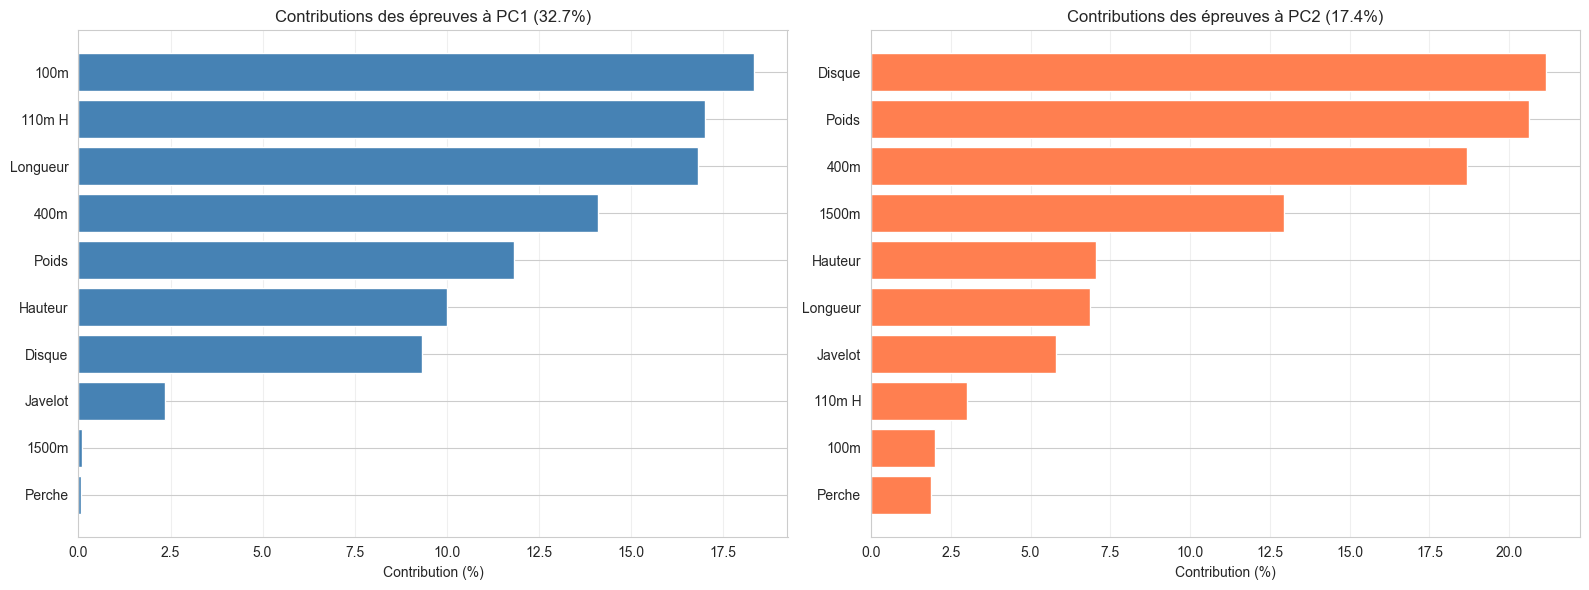

In [ ]:
#visualisation des contributions sous forme de barplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#contributions à PC1
contrib_pc1 = contributions.sort_values('Contrib PC1 (%)', ascending=True)
ax1.barh(contrib_pc1.index, contrib_pc1['Contrib PC1 (%)'], color='steelblue')
ax1.set_xlabel('Contribution (%)')
ax1.set_title(f'Contributions des épreuves à PC1 ({variance_expliquee[0]*100:.1f}%)')
ax1.grid(axis='x', alpha=0.3)

#contributions à PC2
contrib_pc2 = contributions.sort_values('Contrib PC2 (%)', ascending=True)
ax2.barh(contrib_pc2.index, contrib_pc2['Contrib PC2 (%)'], color='coral')
ax2.set_xlabel('Contribution (%)')
ax2.set_title(f'Contributions des épreuves à PC2 ({variance_expliquee[1]*100:.1f}%)')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()